In [89]:
import requests
import time
import random
import json
# from datetime import datetime

In [90]:
# Data collection
morePosts = True
name_of_file = 0
end_cursor = ""
while(morePosts == True):

    r = requests.get("https://www.instagram.com/explore/tags/banksyny/?__a=1&max_id="+ end_cursor)
    morePosts = r.json()["graphql"]["hashtag"]['edge_hashtag_to_media']['page_info']['has_next_page']
    end_cursor = r.json()["graphql"]["hashtag"]['edge_hashtag_to_media']['page_info']['end_cursor']

    with open(str(name_of_file)+'.txt', 'w') as outfile:
        json.dump(r.json(), outfile)
    name_of_file += 1
    time.sleep(random.randint(1,5))
    

In [48]:
r = requests.get("https://www.instagram.com/explore/tags/banksyny/?__a=1")

In [5]:
# Test run
r = requests.get("https://www.instagram.com/explore/tags/banksyny/?__a=1&max_id=QVFEd2s4Y2pwZzdfel9VMXI2clVWRWtfV2ZyNGRldkc4eHRtVml6TExCYUltZUFzektOZWJLUElwNEtMaDNxYlpHZWt1NlI2bG9DdFpPNHljcjdENEM1Tw==")

In [50]:
r.json()["graphql"]["hashtag"]["edge_hashtag_to_media"]["edges"][0]

{'node': {'comments_disabled': False,
  '__typename': 'GraphSidecar',
  'id': '2252028475370401142',
  'edge_media_to_caption': {'edges': [{'node': {'text': 'Painting of NY Skyline from Williamsburg Bridge\n\n#instagood #instagram #instadaily #instafashion #instaart #trending #art #artistsoninstagram #artbaselmiamibeach2019 #artist #artoftheday #artwork #artforsalebyartist #artforsale #graffiti #graffitiart #graffitiartist #banksy #banksyart #banksyny #jeanpaulgaultier #jeanmichelbasquiat #picasso #salvadordali #wutang'}}]},
  'shortcode': 'B9Az_dyhG12',
  'edge_media_to_comment': {'count': 0},
  'taken_at_timestamp': 1582682736,
  'dimensions': {'height': 1020, 'width': 1080},
  'display_url': 'https://scontent-atl3-1.cdninstagram.com/v/t51.2885-15/e35/s1080x1080/84755158_184458156322809_4816789266994045392_n.jpg?_nc_ht=scontent-atl3-1.cdninstagram.com&_nc_cat=109&_nc_ohc=1GX2wDSCriQAX8L_4av&oh=26c93256959e33f0720ce517fa800b3e&oe=5E84DE92',
  'edge_liked_by': {'count': 2},
  'edge_med

In [46]:
# Just for reading the captions and get a sense of it. 
data = r.json()["graphql"]["hashtag"]['edge_hashtag_to_media']['edges']
captions = []
for node in data:
    if (len(node['node']['edge_media_to_caption']['edges']) > 0):
        captions.append(node['node']['edge_media_to_caption']['edges'][0]['node']['text'])

In [103]:
data = []
numFiles = 220
p = 0
test = []
for i in range(numFiles):
    p+=1
    with open(str(i)+'.txt') as json_file:
        d = json.load(json_file)
    test.append(len(d["graphql"]["hashtag"]['edge_hashtag_to_media']['edges']))
    for node in d["graphql"]["hashtag"]['edge_hashtag_to_media']['edges']:
        
        ID = node['node']['id']
        if (len(node['node']['edge_media_to_caption']['edges']) > 0):
            caption = node['node']['edge_media_to_caption']['edges'][0]['node']['text']
        else:
            caption = None
        date = datetime.fromtimestamp(node['node']['taken_at_timestamp']).date()
        time = datetime.fromtimestamp(node['node']['taken_at_timestamp']).time()
        display_url = node['node']['display_url']
        liked_by= node['node']['edge_liked_by']['count']
        if 'accessibility_caption' in node['node']:
            accessibility_caption = node['node']['accessibility_caption']
        else:
            accessibility_caption = None
        data.append({
            'id':ID,
            'caption':caption,
            'date':date,
            'time': time,
            'display_url':display_url,
            'liked_by':liked_by,
            'accessibility_caption':accessibility_caption
               })

#         if (len(node['node']['edge_media_to_caption']['edges']) > 0):
#             caption = node['node']['edge_media_to_caption']['edges'][0]['node']['text'])


In [104]:
len(data)

15737

In [105]:
import pandas as pd
df = pd.DataFrame(data)

In [122]:
captions = []
for item in df['caption']:
    if item != None:
        captions.append(item)

In [123]:
captions

['Painting of NY Skyline from Williamsburg Bridge\n\n#instagood #instagram #instadaily #instafashion #instaart #trending #art #artistsoninstagram #artbaselmiamibeach2019 #artist #artoftheday #artwork #artforsalebyartist #artforsale #graffiti #graffitiart #graffitiartist #banksy #banksyart #banksyny #jeanpaulgaultier #jeanmichelbasquiat #picasso #salvadordali #wutang',
 "Don't talk, act!\n.\n.\n.\n.\n.\n\n#graffitis #graffitiquotes #graffittiart #graffiti_art #streetart #streetartdaily #streetartglobe #banksyny #banksy #banksyariah #streetartquotes #graffitiparis #lagraffiti #graffitila #graffitilondon #streetartporn #quotess #artquotes #artquote #quoteart #streetartquotes #banksyart #banksy#artstation #artcollective #conceptartist #philadelphiagraffiti #philadelphiaart #philadelphiaartist",
 '“Super Mushroom World” 48x36 Canvas. Banksy remix artwork by New York artist Memento. Now available in our Etsy #mario #banksy #mementoart #mushrooms #shrooms #supermario #supermariobros #supermar

### Topic Modeling

In [137]:
import json
import csv
import os
import spacy
spacy.load("en")
from textblob import TextBlob
from spacy import displacy
import seaborn as sns

In [126]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import nltk; nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use',"rt"])

[nltk_data] Downloading package stopwords to /Users/ati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# Convert to list
data = captions

data = [str(sent) for sent in data]

data = [sent.encode('ascii', 'ignore').decode('ascii') for sent in data]

# newlist = []
# for x in data:
#     newlist.append(x.replace('_', ''))

# data = newlist

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

#Remove empty Strings
data = list(filter(None, data))

pprint(data[:1])

['Painting of NY Skyline from Williamsburg Bridge #instagood #instagram '
 '#instadaily #instafashion #instaart #trending #art #artistsoninstagram '
 '#artbaselmiamibeach2019 #artist #artoftheday #artwork #artforsalebyartist '
 '#artforsale #graffiti #graffitiart #graffitiartist #banksy #banksyart '
 '#banksyny #jeanpaulgaultier #jeanmichelbasquiat #picasso #salvadordali '
 '#wutang']


In [128]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:5])

[['painting', 'of', 'ny', 'skyline', 'from', 'williamsburg', 'bridge', 'instagood', 'instagram', 'instadaily', 'instafashion', 'instaart', 'trending', 'art', 'artist', 'artoftheday', 'artwork', 'artforsale', 'graffiti', 'graffitiart', 'graffitiartist', 'banksy', 'banksyart', 'banksyny', 'picasso', 'salvadordali', 'wutang'], ['dont', 'talk', 'act', 'graffitis', 'graffitiquotes', 'graffittiart', 'graffiti_art', 'streetart', 'streetartdaily', 'streetartglobe', 'banksyny', 'banksy', 'banksyariah', 'streetartquotes', 'graffitiparis', 'lagraffiti', 'graffitila', 'graffitilondon', 'streetartporn', 'quotess', 'artquotes', 'artquote', 'quoteart', 'streetartquotes', 'banksyart', 'banksy', 'artstation', 'artcollective', 'conceptartist', 'philadelphiaart'], ['super', 'mushroom', 'world', 'canvas', 'banksy', 'remix', 'artwork', 'by', 'new', 'york', 'artist', 'memento', 'now', 'available', 'in', 'our', 'etsy', 'mario', 'banksy', 'mementoart', 'mushrooms', 'shrooms', 'supermario', 'supermariobros', '

In [129]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['dont', 'talk', 'act', 'graffitis_graffitiquotes_graffittiart_graffiti_art', 'streetart', 'streetartdaily_streetartglobe', 'banksyny', 'banksy', 'banksyariah_streetartquotes_graffitiparis_lagraffiti', 'graffitila_graffitilondon_streetartporn_quotess', 'artquotes_artquote_quoteart_streetartquotes', 'banksyart', 'banksy', 'artstation_artcollective_conceptartist_philadelphiaart']


In [130]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [138]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['paint', 'trend', 'art', 'artist', 'artwork', 'banksy']]


In [139]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [156]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### Topics

In [157]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.279*"find" + 0.096*"book" + 0.055*"side" + 0.052*"keep" + 0.050*"play" + '
  '0.048*"graff" + 0.045*"exhibit" + 0.027*"free" + 0.022*"yet" + '
  '0.019*"repost"'),
 (1,
  '0.241*"banksyny" + 0.102*"people" + 0.096*"spot" + 0.096*"be" + '
  '0.095*"look" + 0.078*"com" + 0.037*"add" + 0.029*"run" + 0.009*"fuck" + '
  '0.009*"tell"'),
 (2,
  '0.553*"graffiti" + 0.079*"good" + 0.035*"pop" + 0.030*"genius" + '
  '0.027*"sticker" + 0.016*"watch" + 0.011*"kill" + 0.009*"page" + '
  '0.004*"artbasel_jayz" + 0.004*"gerhadrichter_neorauch"'),
 (3,
  '0.406*"banksy" + 0.188*"streetart" + 0.112*"art" + 0.038*"love" + '
  '0.033*"artist" + 0.028*"truck" + 0.021*"complete" + 0.011*"call" + '
  '0.010*"dog" + 0.009*"crowd"'),
 (4,
  '0.128*"stencil" + 0.087*"back" + 0.086*"photo" + 0.079*"know" + '
  '0.073*"think" + 0.057*"artwork" + 0.057*"real" + 0.047*"gallery" + '
  '0.038*"exhibition" + 0.021*"always"'),
 (5,
  '0.179*"piece" + 0.103*"see" + 0.060*"take" + 0.040*"late" + 0.038*"come" 

In [158]:
lda_model.top_topics(corpus)

[([(0.17949377, 'piece'),
   (0.10287079, 'see'),
   (0.05994308, 'take'),
   (0.04039158, 'late'),
   (0.037500683, 'come'),
   (0.033911876, 's'),
   (0.032965392, 'check'),
   (0.026809748, 'guy'),
   (0.026411107, 'time'),
   (0.020899149, 'finally'),
   (0.019901494, 'thing'),
   (0.01932326, 'say'),
   (0.018197317, 'close'),
   (0.018174406, 'original'),
   (0.017773867, 'residency'),
   (0.01604248, 'door'),
   (0.015546158, 'even'),
   (0.015283994, 'pretty'),
   (0.013869675, 'picture'),
   (0.013824388, 'much')],
  -5.0196511963339185),
 ([(0.14636157, 'new'),
   (0.13426301, 'go'),
   (0.090355106, 'work'),
   (0.07085928, 'first'),
   (0.04034653, 'mural'),
   (0.030460656, 'second'),
   (0.025030458, 'do'),
   (0.024685, 'let'),
   (0.022225842, 'video'),
   (0.022100676, 'girl'),
   (0.020816036, 'way'),
   (0.019648746, 'heart'),
   (0.019536428, 'have'),
   (0.019054811, 'balloon'),
   (0.017092433, 'guess'),
   (0.016656568, 'open'),
   (0.015180964, 'ever'),
   (0.01

In [175]:
f_df = df.loc[('bronx'in sent for sent in df['caption'] if sent != None) or ('yankeestadium' in sent for sent in df['caption'] if sent != None)]

In [176]:
f_df

,accessibility_caption,caption,date,display_url,id,liked_by,time
4,"Image may contain: 1 person, standing and outdoor",BRONX🔥\n.\n.\n.\n.\n\n#art #artist #banksy #ba...,2020-02-20,https://scontent-atl3-1.cdninstagram.com/v/t51...,2248369463531655122,230,19:55:48
243,"Image may contain: night, sky and outdoor, pos...",We are proud to announce the launch of our mus...,2019-11-17,https://scontent-atl3-1.cdninstagram.com/v/t51...,2179225417550266908,21,10:18:55
515,Image may contain: one or more people,Banksy memorial piece ~ I've got a few spots a...,2019-08-20,https://scontent-atl3-1.cdninstagram.com/v/t51...,2114934048926095870,53,18:23:27
683,None,@bordersframing #DanMeeks another brilliant fr...,2019-06-22,https://scontent-atl3-1.cdninstagram.com/v/t51...,2071949252252098447,207,11:01:44
3173,"Photo by MJ on October 20, 2013.",how 79th & Broadway woke up #banksyny #sundaym...,2013-10-20,https://scontent-atl3-1.cdninstagram.com/v/t51...,570943932666410889,30,11:10:42
3367,Image may contain: indoor,"Mostra ""Street Art - Banksy & Co"" al Palazzo P...",2016-04-10,https://scontent-atl3-1.cdninstagram.com/v/t51...,1225562209661502335,101,16:00:22
3709,"Photo by Josh Harvey on December 27, 2015.",The piece depicted shows a bear reaching for a...,2015-12-27,https://scontent-atl3-1.cdninstagram.com/v/t51...,1149606600525556235,54,19:50:07
3926,Image may contain: 1 person,#loveistheanswer #streetart #alberteinstein #e...,2015-10-12,https://scontent-atl3-1.cdninstagram.com/v/t51...,1094554004131167183,48,21:50:26
3932,"Photo by Ghetta Cards on October 11, 2015.",Company photo. That's me on the far right in t...,2015-10-11,https://scontent-atl3-1.cdninstagram.com/v/t51...,1093556077926839027,105,12:47:44
4167,"Photo by @cleveland.cierra on August 06, 2015.","218/365 taking photos of banksy work in NYC, j...",2015-08-06,https://scontent-atl3-1.cdninstagram.com/v/t51...,1045770723505919081,66,14:26:46


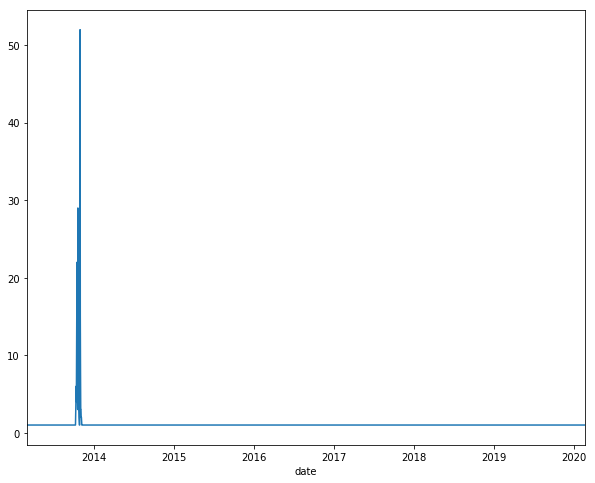

In [177]:

grouped = f_df.groupby('date').count()["caption"]
grouped.plot.line(figsize = (10,8))

In [172]:
type(f_df['date'])

pandas.core.series.Series

In [198]:
startdate = pd.to_datetime('2013-09-01').date()
enddate = pd.to_datetime('2014-01-01').date()
new_df = f_df[(f_df['date'] > startdate) & (f_df['date'] < enddate)]
# new_df = f_df[(f_df['date'] < enddate) and (f_df['date'] > startdate)]

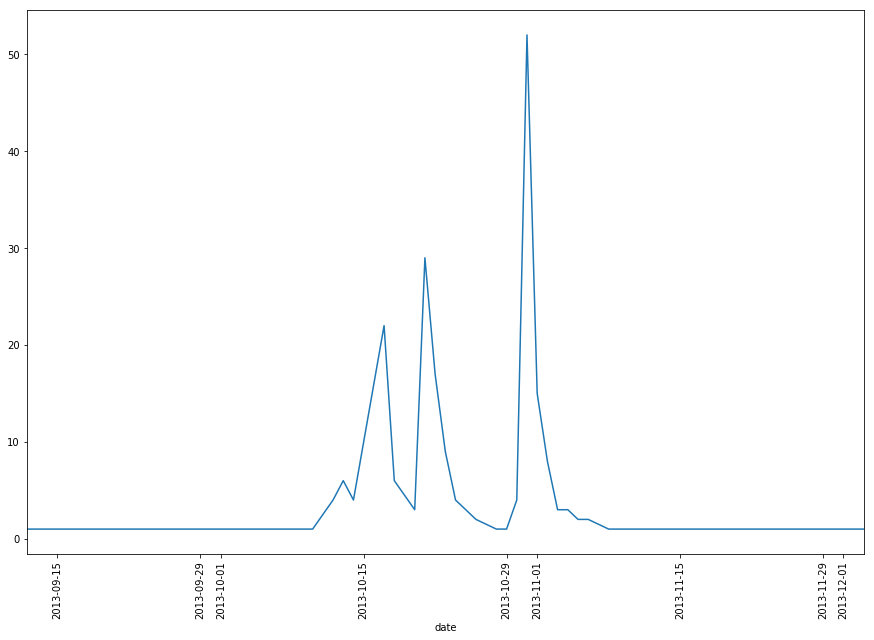

In [225]:
grouped = new_df.groupby('date').count()["caption"]
grouped.plot.line(figsize = (15,10), rot=90)

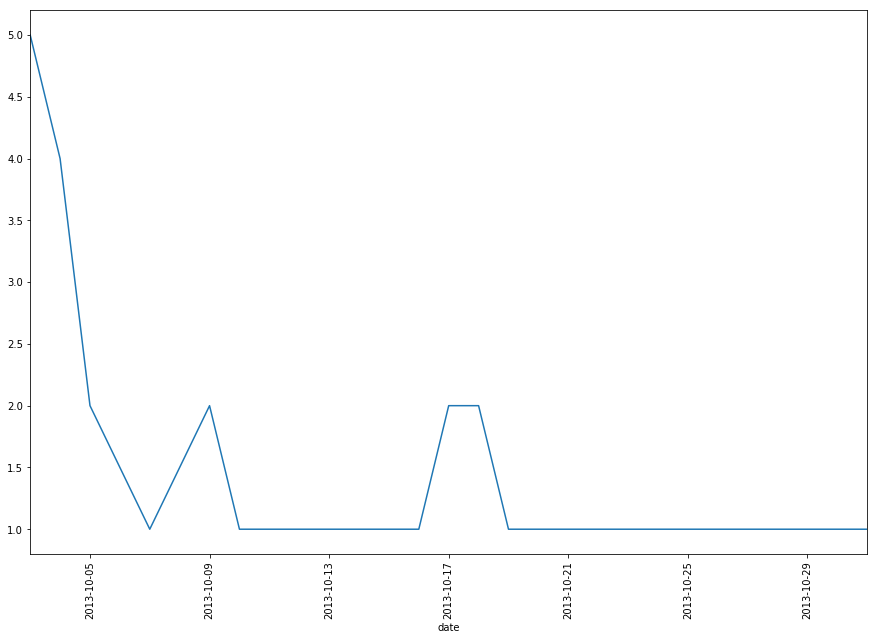

In [227]:
h_df = df.loc[('Bushwick'in sent for sent in df['caption'] if sent != None)]
startdate2 = pd.to_datetime('2013-09-01').date()
enddate2 = pd.to_datetime('2014-02-01').date()
new_h_df = h_df[(h_df['date'] >= startdate2) & (h_df['date'] <= enddate2)]
grouped2 = new_h_df.groupby('date').count()["caption"]
grouped2.plot.line(figsize = (15,10), rot=90)